In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
df=pd.read_csv("student_habits_performance.csv")
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [4]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [5]:
df.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [6]:
df['parental_education_level'].value_counts()

parental_education_level
High School    392
Bachelor       350
Master         167
Name: count, dtype: int64

In [7]:
df['parental_education_level']=df['parental_education_level'].fillna(df['parental_education_level']).mode()[0]

In [8]:
df.isna().sum()

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

In [9]:
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,High School,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,High School,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,High School,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,High School,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,High School,Average,1,No,69.7


In [10]:
cat_col = df.select_dtypes(include='object').columns
cat_col = [col for col in cat_col]
cat_col.remove('student_id')
cat_col

['gender',
 'part_time_job',
 'diet_quality',
 'parental_education_level',
 'internet_quality',
 'extracurricular_participation']

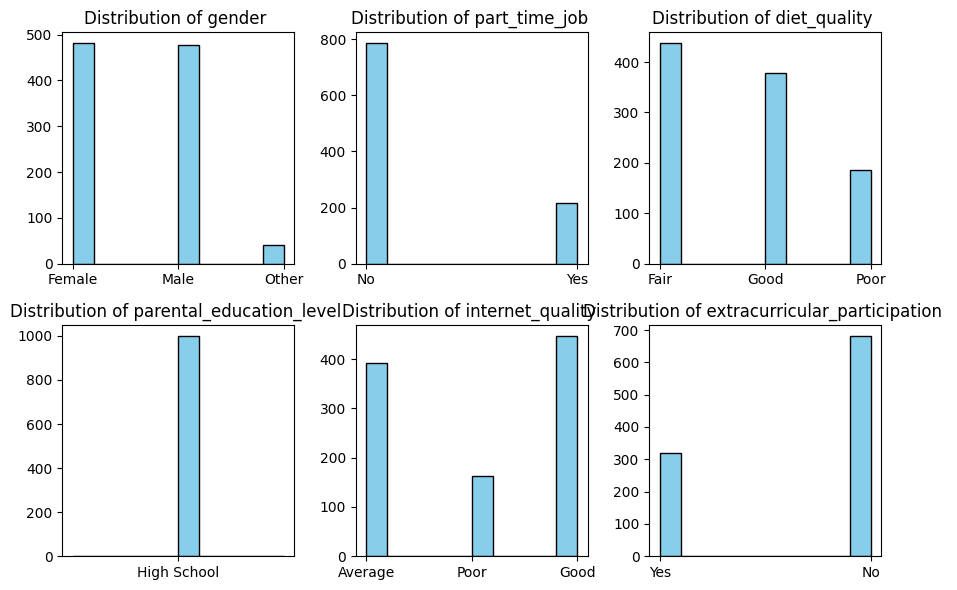

In [11]:
plt.figure(figsize=(9,6))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.hist(df[cat_col[i]],color="skyblue", edgecolor="black")
    plt.title(f"Distribution of {cat_col[i]} ")

plt.tight_layout()
plt.show()


In [12]:
num_col = df.select_dtypes(exclude='object').columns
num_col = [col for col in num_col]
num_col

['age',
 'study_hours_per_day',
 'social_media_hours',
 'netflix_hours',
 'attendance_percentage',
 'sleep_hours',
 'exercise_frequency',
 'mental_health_rating',
 'exam_score']

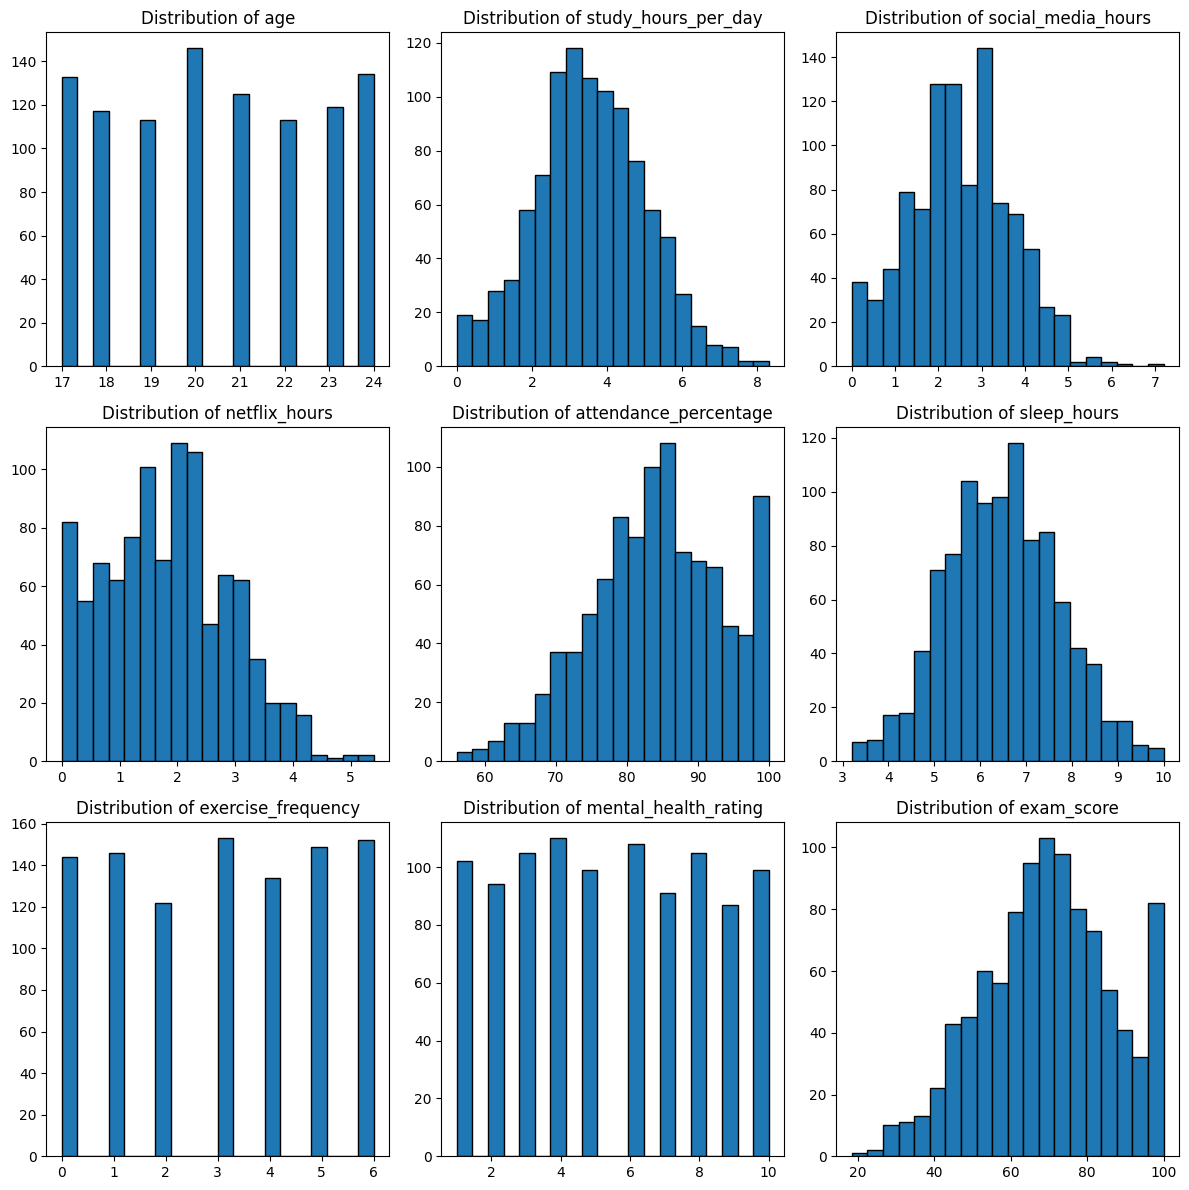

In [13]:
plt.figure(figsize=(12,12))
for i in range(9):
    plt.subplot(3, 3, i+1)  # subplot index starts at 1
    plt.hist(df[num_col[i]],bins=20, edgecolor='black')
    plt.title(f'Distribution of {num_col[i]}')
   
plt.tight_layout()
plt.show()  # show all plots at once

In [14]:
df2=df.drop('student_id',axis=1)
df2.head()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,High School,Average,8,Yes,56.2
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,High School,Good,1,Yes,26.8
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,High School,Good,1,No,66.4


In [15]:
df[cat_col].describe()

,gender,part_time_job,diet_quality,parental_education_level,internet_quality,extracurricular_participation
count,1000,1000,1000,1000,1000,1000
unique,3,2,3,1,3,2
top,Female,No,Fair,High School,Good,No
freq,481,785,437,1000,447,682


In [16]:
for col in cat_col:
    print(col)

gender
part_time_job
diet_quality
parental_education_level
internet_quality
extracurricular_participation


In [17]:
diet_quality = {'Poor':0, 'Fair':1, 'Good':2}
parental_education_level={'High school':0,'Bachelor' : 1, 'Master':2}
internet_quality = {'Poor':0,'Average':1,'Good':2}

In [18]:
df2['dq_e'] = df2['diet_quality'].map(diet_quality)
df2['pel_e'] = df2['parental_education_level'].map(parental_education_level)
df2['ip_e'] = df2['internet_quality'].map(internet_quality)

In [19]:
df2

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,dq_e,pel_e,ip_e
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,High School,Average,8,Yes,56.2,1,NaN,1
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0,2,NaN,1
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3,0,NaN,0
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,High School,Good,1,Yes,26.8,0,NaN,2
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,High School,Good,1,No,66.4,1,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1,1,NaN,2
996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9,0,NaN,1
997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,High School,Good,9,Yes,64.4,2,NaN,2
998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,High School,Average,1,No,69.7,1,NaN,1


In [20]:
dummies = pd.get_dummies(df[['gender', 'part_time_job', 'extracurricular_participation']],dtype=int)

In [21]:
dummies.head()

,gender_Female,gender_Male,gender_Other,part_time_job_No,part_time_job_Yes,extracurricular_participation_No,extracurricular_participation_Yes
0,1,0,0,1,0,0,1
1,1,0,0,1,0,1,0
2,0,1,0,1,0,1,0
3,1,0,0,1,0,0,1
4,1,0,0,1,0,1,0


In [22]:
df3 = pd.concat([df2,dummies], axis=1)

In [23]:
df3

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,...,dq_e,pel_e,ip_e,gender_Female,gender_Male,gender_Other,part_time_job_No,part_time_job_Yes,extracurricular_participation_No,extracurricular_participation_Yes
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,...,1,NaN,1,1,0,0,1,0,0,1
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,...,2,NaN,1,1,0,0,1,0,1,0
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,...,0,NaN,0,0,1,0,1,0,1,0
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,...,0,NaN,2,1,0,0,1,0,0,1
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,...,1,NaN,2,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,...,1,NaN,2,1,0,0,1,0,0,1
996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,...,0,NaN,1,1,0,0,0,1,0,1
997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,...,2,NaN,2,0,1,0,1,0,0,1
998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,...,1,NaN,1,0,1,0,0,1,1,0


In [24]:
df3 = df3.drop(['gender',
          'part_time_job',
          'diet_quality',
          'parental_education_level',
          'internet_quality',
          'extracurricular_participation'],axis=1)
 

In [25]:

df3

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,dq_e,pel_e,ip_e,gender_Female,gender_Male,gender_Other,part_time_job_No,part_time_job_Yes,extracurricular_participation_No,extracurricular_participation_Yes
0,23,0.0,1.2,1.1,85.0,8.0,6,8,56.2,1,NaN,1,1,0,0,1,0,0,1
1,20,6.9,2.8,2.3,97.3,4.6,6,8,100.0,2,NaN,1,1,0,0,1,0,1,0
2,21,1.4,3.1,1.3,94.8,8.0,1,1,34.3,0,NaN,0,0,1,0,1,0,1,0
3,23,1.0,3.9,1.0,71.0,9.2,4,1,26.8,0,NaN,2,1,0,0,1,0,0,1
4,19,5.0,4.4,0.5,90.9,4.9,3,1,66.4,1,NaN,2,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,2.6,0.5,1.6,77.0,7.5,2,6,76.1,1,NaN,2,1,0,0,1,0,0,1
996,17,2.9,1.0,2.4,86.0,6.8,1,6,65.9,0,NaN,1,1,0,0,0,1,0,1
997,20,3.0,2.6,1.3,61.9,6.5,5,9,64.4,2,NaN,2,0,1,0,1,0,0,1
998,24,5.4,4.1,1.1,100.0,7.6,0,1,69.7,1,NaN,1,0,1,0,0,1,1,0


In [26]:
df3 = df3.drop('pel_e', axis=1)


In [27]:
df3

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,dq_e,ip_e,gender_Female,gender_Male,gender_Other,part_time_job_No,part_time_job_Yes,extracurricular_participation_No,extracurricular_participation_Yes
0,23,0.0,1.2,1.1,85.0,8.0,6,8,56.2,1,1,1,0,0,1,0,0,1
1,20,6.9,2.8,2.3,97.3,4.6,6,8,100.0,2,1,1,0,0,1,0,1,0
2,21,1.4,3.1,1.3,94.8,8.0,1,1,34.3,0,0,0,1,0,1,0,1,0
3,23,1.0,3.9,1.0,71.0,9.2,4,1,26.8,0,2,1,0,0,1,0,0,1
4,19,5.0,4.4,0.5,90.9,4.9,3,1,66.4,1,2,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,2.6,0.5,1.6,77.0,7.5,2,6,76.1,1,2,1,0,0,1,0,0,1
996,17,2.9,1.0,2.4,86.0,6.8,1,6,65.9,0,1,1,0,0,0,1,0,1
997,20,3.0,2.6,1.3,61.9,6.5,5,9,64.4,2,2,0,1,0,1,0,0,1
998,24,5.4,4.1,1.1,100.0,7.6,0,1,69.7,1,1,0,1,0,0,1,1,0


<Axes: >

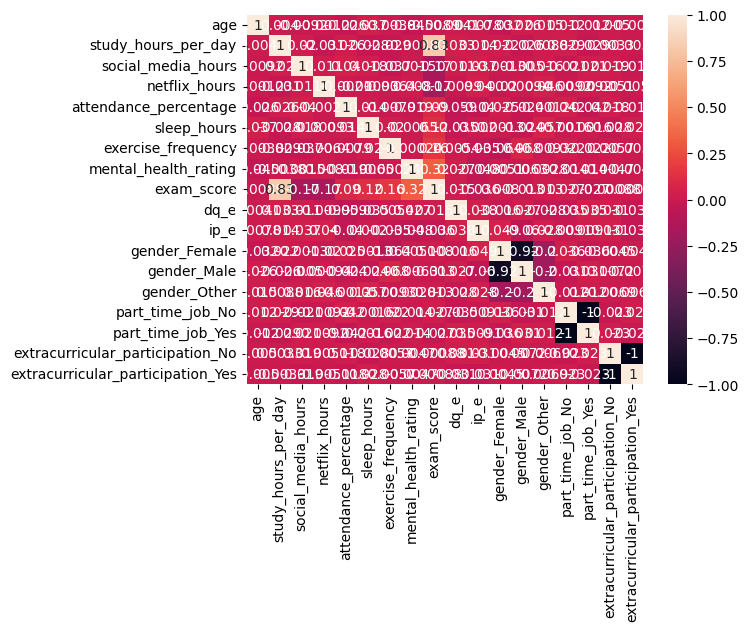

In [28]:
corr = df3.corr()
sns.heatmap(corr,annot=True)



In [29]:
df4 = df3

In [30]:
df4.head()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,dq_e,ip_e,gender_Female,gender_Male,gender_Other,part_time_job_No,part_time_job_Yes,extracurricular_participation_No,extracurricular_participation_Yes
0,23,0.0,1.2,1.1,85.0,8.0,6,8,56.2,1,1,1,0,0,1,0,0,1
1,20,6.9,2.8,2.3,97.3,4.6,6,8,100.0,2,1,1,0,0,1,0,1,0
2,21,1.4,3.1,1.3,94.8,8.0,1,1,34.3,0,0,0,1,0,1,0,1,0
3,23,1.0,3.9,1.0,71.0,9.2,4,1,26.8,0,2,1,0,0,1,0,0,1
4,19,5.0,4.4,0.5,90.9,4.9,3,1,66.4,1,2,1,0,0,1,0,1,0


In [31]:
X = df4.drop('exam_score', axis=1)
y = df4['exam_score']
X.shape, y.shape


((1000, 17), (1000,))

In [32]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(1000, 17)

In [33]:
from sklearn.model_selection import train_test_split


In [34]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42) 
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((800, 17), (200, 17), (800,), (200,))

In [35]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)
lr_model.score(x_test,y_test)

0.8988801072138551

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [37]:
models = {
    "Linear" : LinearRegression(),
    "Ridge"  : Ridge(alpha=1.0),
    "Lasso"  : Lasso(alpha=0.1),
    "Random Forest" : RandomForestRegressor(n_estimators=100,max_depth=5,random_state=42)
 }

In [38]:
for name, model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(f"{name}-> RSquare: {r2_score(y_test,y_pred):.3f},RMSE:{mean_squared_error(y_test,y_pred):.2f}")

Linear-> RSquare: 0.899,RMSE:25.93
Ridge-> RSquare: 0.899,RMSE:25.94
Lasso-> RSquare: 0.898,RMSE:26.03
Random Forest-> RSquare: 0.810,RMSE:48.66


In [39]:
df4.columns

Index(['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating', 'exam_score', 'dq_e', 'ip_e', 'gender_Female',
       'gender_Male', 'gender_Other', 'part_time_job_No', 'part_time_job_Yes',
       'extracurricular_participation_No',
       'extracurricular_participation_Yes'],
      dtype='object')

In [40]:
import pickle

for name, model in models.items():
    with open(f"{name.replace(' ','_').lower()}_model.pkl","wb")as f:
        pickle.dump(model,f)

In [41]:
from sklearn.preprocessing import StandardScaler
import pickle

# Assuming X is already defined and cleaned
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Fit and transform the data

# ✅ Save the scaler to disk
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
